In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import Callback

In [3]:
# load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train[0].shape

(28, 28)

In [5]:
# Scale the data
X_train = X_train / 255.0
X_test =  X_test / 255.0

In [6]:
# Build the model
model = Sequential()

model.add(Flatten(input_shape = [28,28]))
model.add(Dense(150, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [7]:
# custom callback class
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.99):
            print('\n reached 99% Accuracy. Stopped Training!')
            self.model.stop_training = True

In [8]:
# Fit the model
callbacks = myCallback()

model.fit(X_train, y_train,
             epochs=10,
             callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4181 - accuracy: 0.8797
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1176 - accuracy: 0.9659
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0730 - accuracy: 0.9783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0533 - accuracy: 0.9838
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0371 - accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282 - accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0229 - accuracy: 0.9930

 reached 99% Accuracy. Stopped Training!


In [9]:
# model history
import pandas as pd
metrics = pd.DataFrame(model.history.history)

In [10]:
metrics

,loss,accuracy
0,0.249987,0.927250
1,0.111417,0.966950
2,0.073331,0.978150
3,0.054045,0.983133
4,0.040821,0.987450
5,0.032257,0.989633
6,0.025151,0.991950


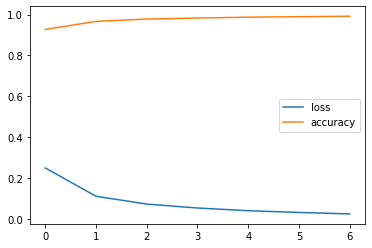

In [13]:
metrics.plot();